The goal of this project is to study how Citi Bike usage in New York City is affected by weather or to see if I can predict Citi Bike usage given a weather report.

I used publicly available weather data from a station in Central Park (accessed via NCEI CDO) and Citi Bike data available from their website.

Below, I plotted the total number of rides taken daily during August 2018.

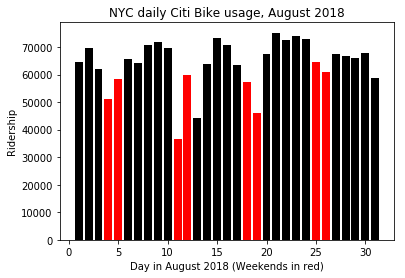

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('201808-citibike-tripdata.csv')
#print(df.head)

#Internet says this is bad practice, so consider revising
#for index, row in df.iterrows():
#    #print(row)
#    #print(int(row['starttime'][8:10]))
#    rides_per_day[int(row['starttime'][8:10]) - 1] += 1

ride_days = df.apply(lambda row: int(row['starttime'][8:10]), axis=1)

rides_per_day = [i for i in range(31)]
days = list(range(1,32))

for i in ride_days:
    rides_per_day[i-1] += 1

#August weekends = 1
colors = [0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0]
for i in range(len(colors)):
    if colors[i] == 0:
        colors[i] = 'black'
    else:
        colors[i] = 'red'

plt.bar(days, rides_per_day, color=colors)
plt.title('NYC daily Citi Bike usage, August 2018')
plt.xlabel('Day in August 2018 (Weekends in red)')
plt.ylabel('Ridership')
plt.show()

From the graph above, it seems that ridership is lower on the weekends, probably because the commuter population that uses Citi Bike during the week don't have work on the weekends (they must not be PhD students). 

To address this, I will split the daily rides into 5 portions: 12-6AM, 6-9AM, 9-4PM, 4-7PM, 7-12AM (Midnight, Morning, Day, Afternoon, Evening).

Below, I plotted stacked bar graphs of daily rides. I expect that they will show a significant reduction in Morning and Afternoon rush hour ridership, whereas other times of day might be less affected.

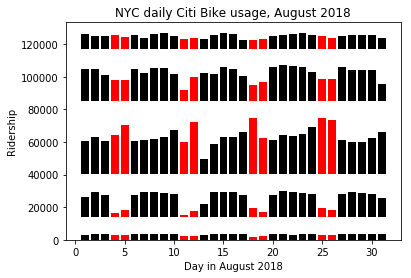

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('201808-citibike-tripdata.csv')
#print(df.head)

ride_days = df.apply(lambda row: [int(row['starttime'][8:10]),int(row['starttime'][11:13])], axis=1)

rides_per_day = [[0,0,0,0,0] for i in range(31)]
days = list(range(1,32))

for i in ride_days:
    time_of_day = -1
    if i[1] <= 6:
        time_of_day = 0
    elif i[1] <= 9:
        time_of_day = 1
    elif i[1] <= 16:
        time_of_day = 2
    elif i[1] <= 19:
        time_of_day = 3
    else:
        time_of_day = 4
        
    rides_per_day[i[0]-1][time_of_day] += 1

#Weekends = 1
#[August]
colors = [0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0]
for i in range(len(colors)):
    if colors[i] == 0:
        colors[i] = 'black'
    else:
        colors[i] = 'red'

numpy_rides_per_day = np.array(rides_per_day)
midnight = numpy_rides_per_day[:,0]
morning = numpy_rides_per_day[:,1]
day = numpy_rides_per_day[:,2]
afternoon = numpy_rides_per_day[:,3]
evening = numpy_rides_per_day[:,4]


#Graphs split to better compare columns
p_midnight = plt.bar(days, midnight, color = colors)
p_morning = plt.bar(days, morning, bottom=(10000+max(midnight)), color=colors)
p_day = plt.bar(days, day, bottom=(20000+max(midnight)+max(morning)), color=colors)
p_afternoon = plt.bar(days, afternoon, bottom=(30000+max(midnight)+max(morning)+max(day)), color = colors)
p_evening = plt.bar(days, evening, bottom=(40000+max(midnight)+max(morning)+max(day)+max(afternoon)), color = colors)
plt.gca().axes.get_yaxis().set_visible(False)


#Graphs touching to compare contribution to daily ridership
#p_midnight = plt.bar(days, midnight, color = 'r')
#p_morning = plt.bar(days, morning, bottom=midnight, color='b')
#p_day = plt.bar(days, day, bottom=midnight+morning, color='g')
#p_afternoon = plt.bar(days, afternoon, bottom=midnight+morning+day, color = 'c')
#p_evening = plt.bar(days, evening, bottom=midnight+morning+day, color = 'y')
#plt.legend((p_midnight,p_morning,p_day,p_afternoon,p_evening),('Midnight', 'Morning','Day','Afternoon','Evening'))

plt.title('NYC daily Citi Bike usage, August 2018')
plt.xlabel('Day in August 2018')
plt.ylabel('Ridership')
plt.show()

The stacked bar graph above shows that on weekends (August 4/5, etc.), there is less ridership during the morning rush hour (6-9AM). Unsurprisingly, this is made up for by increased ridership during the day (9AM-4PM). Below, I present this data as a percent of total daily rides.

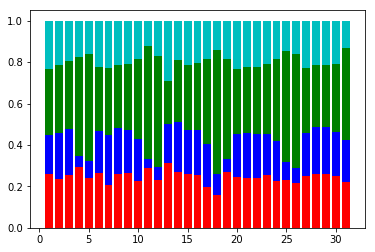

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('201808-citibike-tripdata.csv')
#print(df.head)

ride_days = df.apply(lambda row: [int(row['starttime'][8:10]),int(row['starttime'][11:13])], axis=1)

rides_per_day = [[0,0,0,0] for i in range(31)]
days = list(range(1,32))

for i in ride_days:
    time_of_day = -1
    if i[1] <= 6 or i[1] >= 19:
        time_of_day = 0
    elif i[1] <= 9:
        time_of_day = 1
    elif i[1] <= 16:
        time_of_day = 2
    else:
        time_of_day = 3
        
    rides_per_day[i[0]-1][time_of_day] += 1

#Weekends = 1
#[August]
#colors = [[0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0]]
#for i in range(len(colors)):
#    if colors[i] == 0:
#        colors[i] = 'black'
#    else:
#        colors[i] = 'red'


for j in rides_per_day:
    total_rides = sum(j)
    for k in range(len(j)):
        j[k] = float(j[k])/float(total_rides)        

numpy_rides_per_day = np.array(rides_per_day)
night = numpy_rides_per_day[:,0]
morning = numpy_rides_per_day[:,1]
day = numpy_rides_per_day[:,2]
afternoon = numpy_rides_per_day[:,3]

p_night = plt.bar(days, night, color = 'r')
p_morning = plt.bar(days, morning, bottom=night, color='b')
p_day = plt.bar(days, day, bottom=night+morning, color='g')
p_afternoon = plt.bar(days, afternoon, bottom=night+morning+day, color = 'c')

plt.show()